In [3]:
%load_ext autoreload
%autoreload 2

In [12]:
from trott import *
import numpy as np
import itertools
from qiskit import *
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
from qiskit.providers.aer import QasmSimulator


In [5]:
trott_gate = gen_3cnot_trott_gate() # using the basic trott method (this can be changed)x

In [6]:
tqr = QuantumRegister(1)
tqc = QuantumCircuit(tqr)

tqc.x(0)
tin = tqc.to_instruction()
tinv_in = tqc.inverse().to_instruction()
tin_inv = tqc.to_instruction().inverse()

In [55]:
def get_noise_model(p_err):

    error_gate1 = pauli_error([("X", p_err / 2), ("Z", p_err / 2), ("I", 1 - p_err)])

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_gate1, "x")
    return noise_model

In [56]:
nm = get_noise_model(0.1)

In [57]:
qcd = QuantumCircuit(1,1)
qcd.append(tin, [0])
qcd.append(tinv_in, [0])
qcd.measure([0],[0])
qcd.draw()

┌────────────┐┌───────────────┐┌─┐
q_0: ┤ circuit-14 ├┤ circuit-14_dg ├┤M├
     └────────────┘└───────────────┘└╥┘
c: 1/════════════════════════════════╩═
                                     0

In [58]:
results = execute(qcd, QasmSimulator(), noise_model=nm, shots=1000, optimization_level=0).result().get_counts()

In [59]:
results

{'0': 905, '1': 95}

In [18]:
qr = QuantumRegister(7)
qc = QuantumCircuit(qr)

qc_dummy = QuantumCircuit(qr)

for _ in range(1):
    qc_dummy.append(trott_gate, [qr[1], qr[3], qr[5]])

# Decompose dummy circuit into native gates and append to qc
qc = qc + qc_dummy.decompose().decompose()

qc.draw()

»
q10_0: ─────────────────────────────────────────────────────────────»
            ┌───────────────────────────┐┌───┐        ┌───┐         »
q10_1: ──■──┤ Rx(2*t - 1.5707963267949) ├┤ H ├──■─────┤ H ├──────■──»
         │  └───────────────────────────┘└───┘  │     └───┘      │  »
q10_2: ──┼──────────────────────────────────────┼────────────────┼──»
       ┌─┴─┐         ┌─────────┐              ┌─┴─┐┌──────────┐┌─┴─┐»
q10_3: ┤ X ├─────────┤ Rz(2*t) ├──────────────┤ X ├┤ Rz(-2*t) ├┤ X ├»
       └───┘         └─────────┘              └───┘└──────────┘└───┘»
q10_4: ─────────────────────────────────────────────────────────────»
                                                                    »
q10_5: ─────────────────────────────────────────────────────────────»
                                                                    »
q10_6: ─────────────────────────────────────────────────────────────»
                                                                    »
«                                                                           »
«q10_0: ────────────────────────────────────────────────────────────────────»
«       ┌─────────┐                                                         »
«q10_1: ┤ Rx(π/2) ├─────────────────────────────────────────────────────────»
«       └─────────┘                                                         »
«q10_2: ────────────────────────────────────────────────────────────────────»
«       ┌──────────┐     ┌───────────────────────────┐┌───┐        ┌───┐    »
«q10_3: ┤ Rx(-π/2) ├──■──┤ Rx(2*t - 1.5707963267949) ├┤ H ├──■─────┤ H ├────»
«       └──────────┘  │  └───────────────────────────┘└───┘  │     └───┘    »
«q10_4: ──────────────┼──────────────────────────────────────┼──────────────»
«                   ┌─┴─┐         ┌─────────┐              ┌─┴─┐┌──────────┐»
«q10_5: ────────────┤ X ├─────────┤ Rz(2*t) ├──────────────┤ X ├┤ Rz(-2*t) ├»
«                   └───┘         └─────────┘              └───┘└──────────┘»
«q10_6: ────────────────────────────────────────────────────────────────────»
«                                                                           »
«                        
«q10_0: ─────────────────
«                        
«q10_1: ─────────────────
«                        
«q10_2: ─────────────────
«            ┌─────────┐ 
«q10_3: ──■──┤ Rx(π/2) ├─
«         │  └─────────┘ 
«q10_4: ──┼──────────────
«       ┌─┴─┐┌──────────┐
«q10_5: ┤ X ├┤ Rx(-π/2) ├
«       └───┘└──────────┘
«q10_6: ─────────────────
«

In [6]:
num_qubits = 3
Trott_qr = QuantumRegister(num_qubits)
Trott_qc = QuantumCircuit(Trott_qr, name="Trot")
QuantumCircuit.inverse(trott_gate)

AttributeError: 'Instruction' object has no attribute 'qubits'

In [81]:
calc_parity([1,1,1],[1,0,1])

1

In [82]:
num_qubits = 3
paulis = ["X", "Y", "Z"]
pauli_combos = list(itertools.product(paulis, paulis, paulis))
pauli_combos = ["".join(x) for x in pauli_combos]

st_map = {"label2indx": {}, "indx2label":{}}

n = 0
for p in pauli_combos:
    for j in range(2**num_qubits):
        st_map["label2indx"][(p,j)] = n
        st_map["indx2label"][n] = (p,j)
        n+=1
                
paulis_I = ["X", "Y", "Z", "I"]
pauli_I_combos = list(itertools.product(paulis_I, paulis_I, paulis_I))
pauli_I_combos = ["".join(x) for x in pauli_I_combos]

pe_map = {"label2indx": {}, "indx2label":{}}
n = 0
for p in pauli_I_combos:
    if p == "III":
        continue
    pe_map["label2indx"][p] = n
    pe_map["indx2label"][n] = p
    n+=1
            
M_st_pe = np.zeros((len(pe_map["label2indx"].keys()), len(st_map["label2indx"].keys())))


# Load Data

In [95]:
results = np.load('data/3cnot_noiseless_sim_results_20220414__191350.npy',allow_pickle=True, ).item()

In [96]:
res_analysis = run_analysis(results) 

In [103]:
test_og = res_analysis["data"][19]["data_map"]["ZZZ"]
norm = np.sum(list(test_og.values()))
test_og = {key:val/norm for key, val in test_og.items()}
test_og

{'0x6': 0.9954376220703125, '0x5': 0.0010833740234375, '0x3': 0.00347900390625}

In [104]:
example_parity_results = res_analysis["data"][19]["parity"]
# example_parity_results

In [105]:
prob_results = parity2prob(example_parity_results, return_probs=True)

In [109]:
prob_results

{'XXX': {'0x7': 0.12504325972663033,
  '0x3': 0.09544020228915745,
  '0x5': 0.1758800877465142,
  '0x1': 0.10344560941060382,
  '0x6': 0.10340476036071777,
  '0x2': 0.17607214715745717,
  '0x4': 0.09559920099046493,
  '0x0': 0.12511473231845432},
 'XXY': {'0x7': 0.14558564292060006,
  '0x3': 0.07489781909518772,
  '0x5': 0.17522960238986546,
  '0x1': 0.10409609476725258,
  '0x6': 0.10434309641520184,
  '0x2': 0.1751338111029731,
  '0x4': 0.07497559653388129,
  '0x0': 0.14573833677503795},
 'XXZ': {'0x7': 0.1811911529964871,
  '0x3': 0.03929230901930067,
  '0x5': 0.24008223745557997,
  '0x1': 0.03924345970153806,
  '0x6': 0.24032616615295413,
  '0x2': 0.039150741365220815,
  '0x4': 0.18153956201341417,
  '0x0': 0.03917437129550508},
 'XYX': {'0x7': 0.13285862074957955,
  '0x3': 0.08143454127841526,
  '0x5': 0.16806472672356498,
  '0x1': 0.11745127042134601,
  '0x6': 0.1172509988149007,
  '0x2': 0.1681927310095893,
  '0x4': 0.081752962536282,
  '0x0': 0.13299414846632218},
 'XYY': {'0x7'

In [ ]:
for p in pauli_combos: # pauli strings
    for j in range(2**num_qubits): # readout values
        readout_result = readout_results[j,:]
        for active_spot in active_spots: # active spots
            multiplicity = 3**len(active_spot[active_spot==0]) # <XII> can be sourced from 3^2 prob dists, <XYI> can be sourced from 3^1 prob dist
            
            pe = calc_adjusted_pauli_string(p, active_spot)
            if pe == "III":
                continue
            # print(p, pe, j)
            readout_bin = make_bin(j) # 6 -> [1,1,0]
            
            # [1,0,1]*[1,1,0] -> [1,0,0] -> 1+0+0 -> 1 % 2 -> 1
            parity_01 = (np.sum(active_spots*readout_bin) % 2)
            # 0,1 -> 1,-1
            parity = (1-parity_01*2)
            
            row_indx = pe_map["label2indx"][pe]
            col_indx = st_map["label2indx"][(p,j)]

            M_st_pe[row_indx, col_indx] = parity/multiplicity

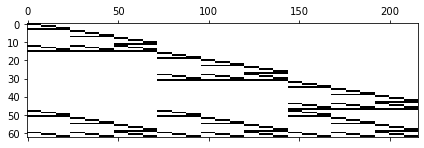

In [27]:
ax = plt.spy(M_st_pe)
fig = plt.gcf()
fig.tight_layout()

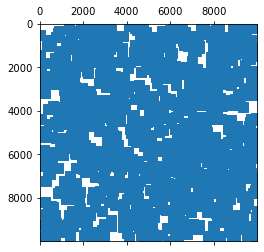

In [20]:
import matplotlib.pylab as plt
import scipy.sparse as sps
A = sps.rand(10000,10000, density=0.00001)
M = sps.csr_matrix(A)
plt.spy(M)
plt.show()